Random Forest Classifier

Import the libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [17]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Building the Random Forest model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Performing Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10,20,30]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score: 0.9522151898734176


Evaluate the accuracy

In [20]:
from sklearn.metrics import accuracy_score

best_rf = RandomForestClassifier(**best_params, random_state = 42)

best_rf.fit(x_train, y_train)
y_pred_best = best_rf.predict(x_test)

print('Accuracy of the tunel model: ', accuracy_score(y_test, y_pred_best))

Accuracy of the tunel model:  0.9707602339181286


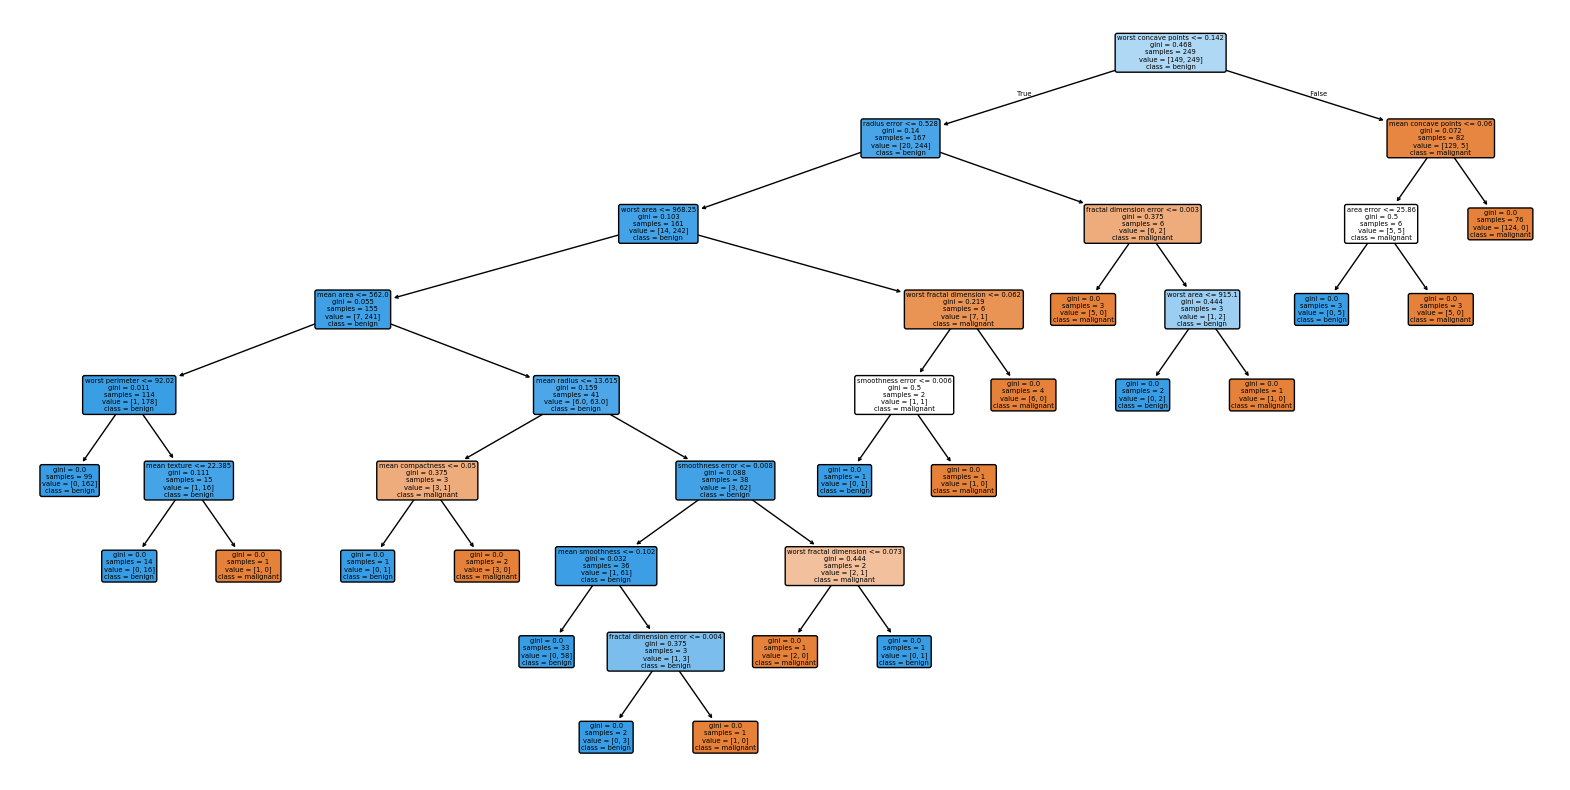

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_to_visualize = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))


plot_tree(tree_to_visualize,
          feature_names=dataset.feature_names,
          class_names=[str(name) for name in dataset.target_names],
          filled=True, rounded=True)

plt.show()